In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
from pprint import pprint
import csv
import gmaps
import datetime

In [2]:
park_visits = "Top10_Parks_Visits/Top10_Park_Visits.csv"
park_visits_df = pd.read_csv(park_visits, encoding="utf-8")

park_visits_df.head()

,Park,Year,Month,Visits
0,Acadia National Park,2018,1,11974
1,Acadia National Park,2018,2,12167
2,Acadia National Park,2018,3,23756
3,Acadia National Park,2018,4,72858
4,Acadia National Park,2018,5,249050


In [3]:
parks_weather_coords = "with_coords.csv"
parks_weather_coords_df = pd.read_csv(parks_weather_coords, encoding="utf-8")

parks_weather_coords_df.head()

,Park,Year,Month,Temp,Vistors,Lat,Lng
0,Acadia National Park,2009,1,21.501818,NaN,44.338556,-68.273335
1,Acadia National Park,2009,2,28.770000,NaN,44.338556,-68.273335
2,Acadia National Park,2009,3,32.956000,NaN,44.338556,-68.273335
3,Acadia National Park,2009,4,45.278000,NaN,44.338556,-68.273335
4,Acadia National Park,2009,5,54.897273,NaN,44.338556,-68.273335


In [35]:
final_merge_data = pd.merge(parks_weather_coords_df, park_visits_df, left_on=["Park", "Year", "Month"], right_on=["Park", "Year", "Month"], how="outer")
del final_merge_data["Vistors"]
final_merge_data.to_csv("final_merge_data.csv", index = False, header = True)
final_merge_data.head()

,Park,Year,Month,Temp,Lat,Lng,Visits
0,Acadia National Park,2009,1,21.501818,44.338556,-68.273335,9366
1,Acadia National Park,2009,2,28.770000,44.338556,-68.273335,9751
2,Acadia National Park,2009,3,32.956000,44.338556,-68.273335,19258
3,Acadia National Park,2009,4,45.278000,44.338556,-68.273335,59277
4,Acadia National Park,2009,5,54.897273,44.338556,-68.273335,129885


In [20]:

g = final_merge_data.groupby(["Park"])
for park, park_df in g:
    print(park)
    print(park_df)

Acadia National Park
                     Park  Year  Month       Temp        Lat        Lng  \
0    Acadia National Park  2009      1  21.501818  44.338556 -68.273335   
1    Acadia National Park  2009      2  28.770000  44.338556 -68.273335   
2    Acadia National Park  2009      3  32.956000  44.338556 -68.273335   
3    Acadia National Park  2009      4  45.278000  44.338556 -68.273335   
4    Acadia National Park  2009      5  54.897273  44.338556 -68.273335   
5    Acadia National Park  2009      6  59.150000  44.338556 -68.273335   
6    Acadia National Park  2009      7  62.654000  44.338556 -68.273335   
7    Acadia National Park  2009      8  68.203000  44.338556 -68.273335   
8    Acadia National Park  2009      9  59.403000  44.338556 -68.273335   
9    Acadia National Park  2009     10  48.867273  44.338556 -68.273335   
10   Acadia National Park  2009     11  46.557000  44.338556 -68.273335   
11   Acadia National Park  2009     12  31.283000  44.338556 -68.273335   
12  

In [39]:
final_merge_data.reset_index

pivot = final_merge_data.pivot_table(index = "Park", values = ["Year", "Month", "Temp", "Lat", "Lng"])
pivot



,Lat,Lng,Month,Temp,Year
Park,,,,,
Acadia National Park,44.338556,-68.273335,6.5,48.787814,2013.5
Glacier National Park,48.759613,-113.787023,6.5,46.608824,2013.5
Grand Canyon National Park,36.106965,-112.112997,6.5,72.807969,2013.5
Grand Teton National Park,43.790428,-110.681763,6.5,48.870607,2013.5
Great Smoky Mountains National Park,35.611764,-83.489545,6.5,58.290080,2013.5
Olympic National Park,47.802107,-123.604352,6.5,42.913665,2013.5
Rocky Mountain National Park,40.342793,-105.683639,6.5,47.242592,2013.5
Yellowstone National Park,44.427963,-110.588455,6.5,45.271805,2013.5
Yosemite National Park,37.865101,-119.538329,6.5,52.604082,2013.5


([<matplotlib.axis.XTick at 0x11f4b66d8>,
 <a list of 7 Text xticklabel objects>)

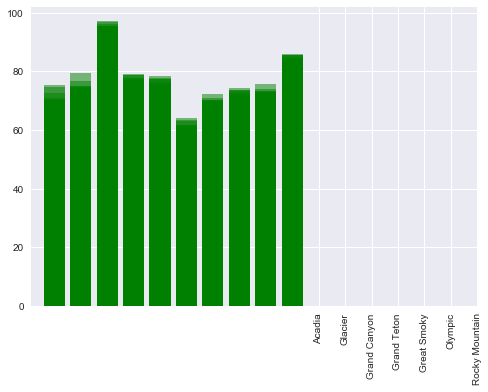

In [61]:
plt.bar(final_merge_data["Park"], final_merge_data["Temp"], color='g', alpha=0.5, align="center")
tick_locations = [value for value in final_merge_data]
plt.xticks(tick_locations, ["Acadia", "Glacier", "Grand Canyon", "Grand Teton", "Great Smoky", "Olympic", "Rocky Mountain", "Yellowstone", "Yosemite", "Zion"], rotation="vertical")



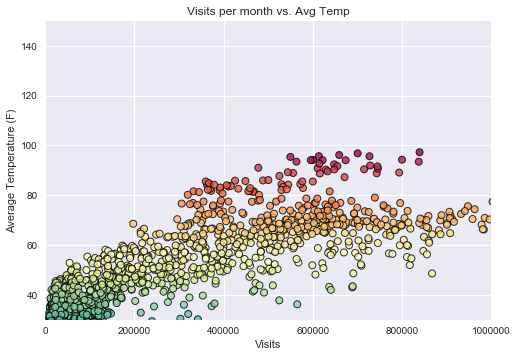

In [11]:


plt.scatter(final_merge_data["Visits"], 
            final_merge_data["Temp"], c=final_merge_data["Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Visits per month vs. Avg Temp")
plt.ylabel("Average Temperature (F)")
plt.xlabel("Visits")
plt.grid(True)
plt.xlim([0, 1000000])
plt.ylim([30, 150])



# Show plot
plt.show()